In [73]:

pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.


In [74]:
import nbformat
print(nbformat.__version__)

5.10.4


In [75]:
import numpy as np
import pandas as pd

import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
#Graficas de los Portatiles
df_portatiles = pd.read_csv('productosPortatil-limpio.csv')
df_portatiles.head()

,producto_id,timestamp,nombre,url,precio,precio_tachado,rating,opiniones,categoria
0,1,2025-02-21 17:19:06,Apple MacBook Pro Apple M4 Pro 14 Núcleos/24GB...,https://www.pccomponentes.com/portatil-apple-m...,2688.0,2949.0,4.9,23,Portátiles con inteligencia artificial
1,2,2025-02-21 17:19:06,Acer Chromebook Plus 514 CB514-3H-R81B AMD Ryz...,https://www.pccomponentes.com/acer-chromebook-...,369.0,499.0,4.6,106,Portátiles con inteligencia artificial
2,3,2025-02-21 17:19:06,Apple MacBook Air Apple M3 8 Núcleos/16GB/256G...,https://www.pccomponentes.com/portatil-apple-m...,1489.0,1599.0,4.7,3,Portátiles con inteligencia artificial
3,4,2025-02-21 17:19:06,Apple MacBook Air Apple M3 8 Núcleos/24GB/512G...,https://www.pccomponentes.com/portatil-apple-m...,1599.0,1759.0,4.8,350,Portátiles con inteligencia artificial
4,5,2025-02-21 17:19:06,Apple MacBook Air Apple M3 8 Núcleos/16GB/256G...,https://www.pccomponentes.com/portatil-apple-m...,1429.0,1599.0,4.5,1,Portátiles con inteligencia artificial


In [77]:
df_portatiles['categoria'].unique()

array(['Portátiles con inteligencia artificial', 'Estaciones de energía',
       'Altavoces portátiles', 'Lenovo', 'Repuestos', 'Alurin', 'HP',
       'Portátiles con Windows', 'ASUS', 'Monitor portátil',
       'Cocinas portátiles', 'MSI', 'Portátiles 2 en 1 convertibles',
       'Neveras portátiles', 'Portátiles'], dtype=object)

In [78]:
df_portatiles.describe()

,producto_id,precio,precio_tachado,rating,opiniones
count,494.000000,494.000000,272.000000,382.000000,494.000000
mean,247.500000,675.205445,914.785772,4.433246,122.107287
std,142.749781,718.823264,698.909843,0.560436,244.390832
min,1.000000,2.580000,24.680000,0.500000,0.000000
25%,124.250000,94.655000,426.497500,4.225000,1.000000
50%,247.500000,474.495000,759.000000,4.500000,15.500000
75%,370.750000,999.965000,1303.942500,4.700000,122.000000
max,494.000000,5198.990000,3849.000000,5.000000,1503.000000


In [79]:
df_portatiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   producto_id     494 non-null    int64  
 1   timestamp       494 non-null    object 
 2   nombre          494 non-null    object 
 3   url             494 non-null    object 
 4   precio          494 non-null    float64
 5   precio_tachado  272 non-null    float64
 6   rating          382 non-null    float64
 7   opiniones       494 non-null    int64  
 8   categoria       494 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 34.9+ KB


In [80]:
df_portatiles['timestamp'] = pd.to_datetime(df['timestamp'])

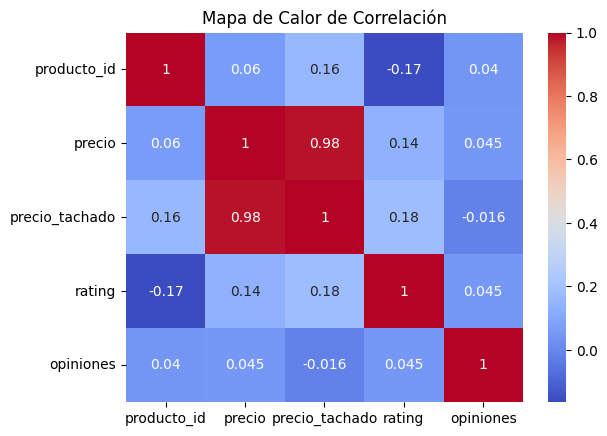

In [81]:
df_numerico = df_portatiles.select_dtypes(include=['number'])

sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [82]:
px.histogram(data_frame = df_portatiles, 
             x          = "precio",
             nbins      = 40)

In [83]:
fig = go.Figure()

for categoria in df_portatiles['categoria'].unique():
    df_filtrado = df_portatiles[df_portatiles['categoria'] == categoria]
    fig.add_trace(go.Scatter(
        x=df_filtrado['precio'],
        y=df_filtrado['rating'],
        mode='markers',
        name=categoria
    ))

fig.update_layout(
    title='Gráfico de Dispersión por Categoría: Precio - Rating',
    xaxis_title='Precio',
    yaxis_title='Rating',
    template='plotly_dark'
)

fig.show()

In [84]:
fig = go.Figure()

for categoria in df_portatiles['categoria'].unique():
    df_filtrado = df_portatiles[df_portatiles['categoria'] == categoria]
    fig.add_trace(go.Scatter(
        x=df_filtrado['opiniones'],
        y=df_filtrado['rating'],
        mode='markers',
        name=categoria
    ))

fig.update_layout(
    title='Gráfico de Dispersión por Categoría: Opiniones - Rating',
    xaxis_title='opiniones',
    yaxis_title='Rating',
    template='plotly_dark'
)

fig.show()

In [85]:
df_portatiles['descuento_%'] = (((df_portatiles['precio'] - df_portatiles['precio_tachado']) / df_portatiles['precio']) * 100)*-1
df_portatiles['descuento_%'] = df_portatiles['descuento_%'].round(2)
df_portatiles['descuento_%'] = df_portatiles['descuento_%'].fillna(0)


In [86]:
df_portatiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   producto_id     494 non-null    int64         
 1   timestamp       494 non-null    datetime64[ns]
 2   nombre          494 non-null    object        
 3   url             494 non-null    object        
 4   precio          494 non-null    float64       
 5   precio_tachado  272 non-null    float64       
 6   rating          382 non-null    float64       
 7   opiniones       494 non-null    int64         
 8   categoria       494 non-null    object        
 9   descuento_%     494 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 38.7+ KB


In [ ]:
px.histogram(data_frame = df_portatiles,
             x          = "rating",
             color      = "categoria",
             title      = "Histograma de Rating por Categoría",
             template   = "plotly_dark")

In [ ]:
px.scatter_3d(data_frame = df_portatiles,
              x          = "precio",
              y          = "rating",
              z          = "opiniones",
              color      = "categoria"
              )

In [88]:
px.histogram(data_frame = df_portatiles,
                x          = "descuento_%",
                color      = "categoria",
                title      = "Histograma de Descuento por Categoría",
                template   = "plotly_dark")

In [91]:
#Graficos del Df de componentes
df_componentes = pd.read_csv('productos_componentes_pc_limpio.csv')
df_componentes.head()

,producto_id,timestamp,nombre,url,precio,precio_tachado,rating,opiniones,categoria
0,1,2025-02-21 17:23:39,ASUS PRIME B760-PLUS,https://www.pccomponentes.com/asus-prime-b760-...,134.00,164.90,4.6,598,ASUS
1,2,2025-02-21 17:23:39,ASUS TUF GAMING B650-PLUS,https://www.pccomponentes.com/asus-tuf-gaming-...,213.15,267.51,4.5,953,ASUS
2,3,2025-02-21 17:23:39,ASUS PRIME B650-PLUS WIFI,https://www.pccomponentes.com/placa-base-asus-...,164.95,NaN,4.5,235,ASUS
3,4,2025-02-21 17:23:39,ASUS PRIME B550M-A WIFI II,https://www.pccomponentes.com/asus-prime-b550m...,123.75,151.68,4.5,1022,ASUS
4,5,2025-02-21 17:23:39,ASUS TUF GAMING B650-E WIFI,https://www.pccomponentes.com/placa-base-asus-...,174.95,NaN,4.7,107,ASUS


In [93]:
df_componentes['categoria'].unique()
df_componentes.describe()

,producto_id,precio,precio_tachado,rating,opiniones
count,454.000000,454.000000,169.000000,402.000000,454.000000
mean,227.500000,181.442533,213.327219,4.586816,622.405286
std,131.202769,180.343543,190.086975,0.388424,2313.043688
min,1.000000,1.210000,1.750000,0.500000,0.000000
25%,114.250000,61.700000,70.980000,4.500000,6.000000
50%,227.500000,129.125000,151.860000,4.700000,54.500000
75%,340.750000,234.387500,284.000000,4.800000,340.750000
max,454.000000,1578.070000,855.000000,5.000000,25134.000000


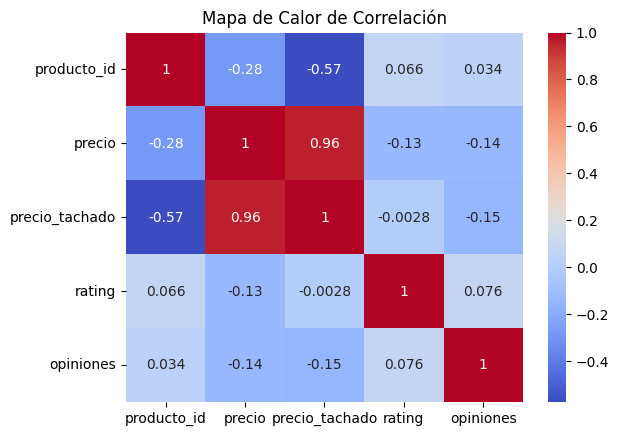

In [94]:
df_numerico = df_componentes.select_dtypes(include=['number'])

sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [98]:
px.histogram(data_frame = df_componentes, 
             x          = "precio",
             nbins      = 40)



In [101]:
fig = go.Figure()

for categoria in df_componentes['categoria'].unique():
    df_filtrado = df_componentes[df_componentes['categoria'] == categoria]
    fig.add_trace(go.Scatter(
        x=df_filtrado['precio'],
        y=df_filtrado['rating'],
        mode='markers',
        name=categoria
    ))

fig.update_layout(
    title='Gráfico de Dispersión por Categoría: Precio - Rating',
    xaxis_title='Precio',
    yaxis_title='Rating',
    template='plotly_dark'
)

fig.show()

In [104]:
fig = go.Figure()

for categoria in df_componentes['categoria'].unique():
    df_filtrado = df_componentes[df_componentes['categoria'] == categoria]
    fig.add_trace(go.Scatter(
        x=df_filtrado['opiniones'],
        y=df_filtrado['rating'],
        mode='markers',
        name=categoria
    ))

fig.update_layout(
    title='Gráfico de Dispersión por Categoría: Opiniones - Rating',
    xaxis_title='opiniones',
    yaxis_title='Rating',
    template='plotly_dark'
)

fig.show()

In [106]:
df_componentes['descuento_%'] = (((df_componentes['precio'] - df_componentes['precio_tachado']) / df_componentes['precio']) * 100)*-1
df_componentes['descuento_%'] = df_componentes['descuento_%'].round(2)
df_componentes['descuento_%'] = df_componentes['descuento_%'].fillna(0)

In [107]:
px.histogram(data_frame = df_componentes,
             x          = "rating",
             color      = "categoria",
             title      = "Histograma de Rating por Categoría",
             template   = "plotly_dark")

In [109]:
px.scatter_3d(data_frame = df_componentes,
              x          = "precio",
              y          = "rating",
              z          = "opiniones",
              color      = "categoria"
              )

In [111]:
px.histogram(data_frame = df_componentes,
                x          = "descuento_%",
                color      = "categoria",
                title      = "Histograma de Descuento por Categoría",
                template   = "plotly_dark")